<a href="https://colab.research.google.com/github/joepotts220/DA_M2_project_Joe_Potts/blob/main/DA_M2_project_J_Potts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA M2 Project Notebook - Joe Potts

## Title:  Have US hurricanes increased in intensity over time?

  - The dataset was downloaded from the NOAA National Centers for Environmental Information (NCEI) website covering the years from 1975 to 2021.  The data set includes hurricanes, tropical storms and other storm types, and each hurricane can have multiple rows showing the differing measurements taken during a storms duration.

In [1]:
import pip
pip.main(['install', 'mplcursors==0.6'])

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting mplcursors==0.6

Downloading mplcursors-0.6-py3-none-any.whl.metadata (3.0 kB)

Requirement already satisfied: matplotlib!=3.7.1,>=3.1 in /usr/local/lib/python3.10/dist-packages (from mplcursors==0.6) (3.8.0)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (1.3.1)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (4.55.3)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (1.4.7)

Requirement already satisfied: numpy<2,>=1.21 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (1.26.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (24.2)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (11.0.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (2.8.2)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib!=3.7.1,>=3.1->mplcursors==0.6) (1.17.0)

Downloading mplcursors-0.6-py3-none-any.whl (20 kB)

Installing collected packages: mplcursors

Successfully installed mplcursors-0.6

0

### NOTE:
  - The PIP import was done to enable the mplcursors import.

### Import pandas
### Load data into DataFrame:  df_orig
### Create a working copy of the original DataFrame:  df_wk
### Verify load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

NumExpr defaulting to 2 threads.

In [3]:
df_orig = pd.read_csv("NOAA_NCEI.csv")
df_orig.head()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [4]:
df_wk = df_orig.copy()
df_wk.head(2)


,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN


In [5]:
df_wk.tail(2)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0
19065,19066,Wanda,2021,11,8,0,43.2,-29.7,other low,NaN,40,1006,70.0,0.0


In [6]:
print(df_wk.shape)

(19066, 14)


## Filter df_wk to show status = 'hurricane'

In [7]:
df_wk_hur = df_wk[df_wk['status'].isin(['hurricane'])]
print(df_wk_hur.head(10))

    Unnamed: 0      name  year  month  day  hour   lat  long     status  \
44          45   Blanche  1975      7   27     6  35.9 -70.0  hurricane   
45          46   Blanche  1975      7   27    12  36.9 -69.0  hurricane   
46          47   Blanche  1975      7   27    18  37.9 -68.0  hurricane   
47          48   Blanche  1975      7   28     0  39.3 -67.2  hurricane   
48          49   Blanche  1975      7   28     6  41.2 -66.4  hurricane   
73          74  Caroline  1975      8   30     0  23.3 -94.2  hurricane   
74          75  Caroline  1975      8   30     6  23.5 -94.9  hurricane   
75          76  Caroline  1975      8   30    12  23.7 -95.6  hurricane   
76          77  Caroline  1975      8   30    18  23.8 -96.3  hurricane   
77          78  Caroline  1975      8   31     0  24.0 -97.0  hurricane   

    category  wind  pressure  tropicalstorm_force_diameter  \
44       1.0    65       987                           NaN   
45       1.0    70       984                      

## Data cleaning
  - Show info()
  - Print DataFrame shape
  - Print column data types
  - Print missing values
  - Change all column name to upper case
  - Replace Unnamed: 0 column name w/ INDEX
  - Transform 'YEAR' and 'MONTH' to date formats
  - Print discriptive statistics
  - I did not drop any columns.  In a previous version I did drop some columns causing all subsequent scripts to error out.  Could not fix this issue.


In [25]:
df_wk_hur.info(verbose = True, show_counts = False)

<class 'pandas.core.frame.DataFrame'>
Index: 4684 entries, 44 to 18980
Data columns (total 14 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   INDEX                         int64         
 1   NAME                          object        
 2   YEAR                          datetime64[ns]
 3   MONTH                         datetime64[ns]
 4   DAY                           int64         
 5   HOUR                          int64         
 6   LAT                           float64       
 7   LONG                          float64       
 8   STATUS                        object        
 9   CATEGORY                      float64       
 10  WIND                          int64         
 11  PRESSURE                      int64         
 12  TROPICALSTORM_FORCE_DIAMETER  float64       
 13  HURRICANE_FORCE_DIAMETER      float64       
dtypes: datetime64[ns](2), float64(5), int64(5), object(2)
memory usage: 677.9+ KB


In [8]:
print(df_wk_hur.shape)

(4684, 14)


In [9]:
print(df_wk_hur.dtypes)

Unnamed: 0                        int64
name                             object
year                              int64
month                             int64
day                               int64
hour                              int64
lat                             float64
long                            float64
status                           object
category                        float64
wind                              int64
pressure                          int64
tropicalstorm_force_diameter    float64
hurricane_force_diameter        float64
dtype: object


In [23]:
missing_values = df_wk_hur.isna().sum()

print(missing_values)

INDEX                              0
NAME                               0
YEAR                               0
MONTH                              0
DAY                                0
HOUR                               0
LAT                                0
LONG                               0
STATUS                             0
CATEGORY                           0
WIND                               0
PRESSURE                           0
TROPICALSTORM_FORCE_DIAMETER    2633
HURRICANE_FORCE_DIAMETER        2633
dtype: int64


In [11]:
df_wk_hur.columns = df_wk_hur.columns.str.upper()
df_wk_hur.head(2)

,UNNAMED: 0,NAME,YEAR,MONTH,DAY,HOUR,LAT,LONG,STATUS,CATEGORY,WIND,PRESSURE,TROPICALSTORM_FORCE_DIAMETER,HURRICANE_FORCE_DIAMETER
44,45,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65,987,NaN,NaN
45,46,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,NaN,NaN


In [12]:
df_wk_hur.columns = df_wk_hur.columns.str.replace('UNNAMED: 0', 'INDEX')
df_wk_hur.head(2)

,INDEX,NAME,YEAR,MONTH,DAY,HOUR,LAT,LONG,STATUS,CATEGORY,WIND,PRESSURE,TROPICALSTORM_FORCE_DIAMETER,HURRICANE_FORCE_DIAMETER
44,45,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65,987,NaN,NaN
45,46,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,NaN,NaN


In [13]:
df_wk_hur['YEAR'] = pd.to_datetime(df_wk_hur['YEAR'], format='%Y')
print(df_wk_hur.dtypes)  # format = %Y and %m

INDEX                                    int64
NAME                                    object
YEAR                            datetime64[ns]
MONTH                                    int64
DAY                                      int64
HOUR                                     int64
LAT                                    float64
LONG                                   float64
STATUS                                  object
CATEGORY                               float64
WIND                                     int64
PRESSURE                                 int64
TROPICALSTORM_FORCE_DIAMETER           float64
HURRICANE_FORCE_DIAMETER               float64
dtype: object


<ipython-input-13-a5f5aad585e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wk_hur['YEAR'] = pd.to_datetime(df_wk_hur['YEAR'], format='%Y')


In [14]:
df_wk_hur['MONTH'] = pd.to_datetime(df_wk_hur['MONTH'], format='%m')
print(df_wk_hur.dtypes)

INDEX                                    int64
NAME                                    object
YEAR                            datetime64[ns]
MONTH                           datetime64[ns]
DAY                                      int64
HOUR                                     int64
LAT                                    float64
LONG                                   float64
STATUS                                  object
CATEGORY                               float64
WIND                                     int64
PRESSURE                                 int64
TROPICALSTORM_FORCE_DIAMETER           float64
HURRICANE_FORCE_DIAMETER               float64
dtype: object


<ipython-input-14-770aacec3c58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wk_hur['MONTH'] = pd.to_datetime(df_wk_hur['MONTH'], format='%m')


In [15]:
df_wk_hur[['WIND', 'PRESSURE']].describe()

,WIND,PRESSURE
count,4684.000000,4684.000000
mean,86.648164,968.743168
std,20.707516,18.727738
min,65.000000,882.000000
25%,70.000000,958.000000
50%,80.000000,973.000000
75%,100.000000,984.000000
max,165.000000,1005.000000


## Correlation value of pressure to wind
  - The correlation value was -0.90
  - Quick scatter plot verifying the correlation value
  - Result:  a very negative correlation--as pressure decreases, wind speed increases, as expected

In [16]:
# shows very negative correlation:  as pressure decreases, wind speed increases
corr_val = (df_wk_hur['PRESSURE'].corr(df_wk_hur['WIND']))
corr_val_rnd = corr_val.round(2)
print(corr_val_rnd)

-0.9


<Axes: xlabel='PRESSURE', ylabel='WIND'>

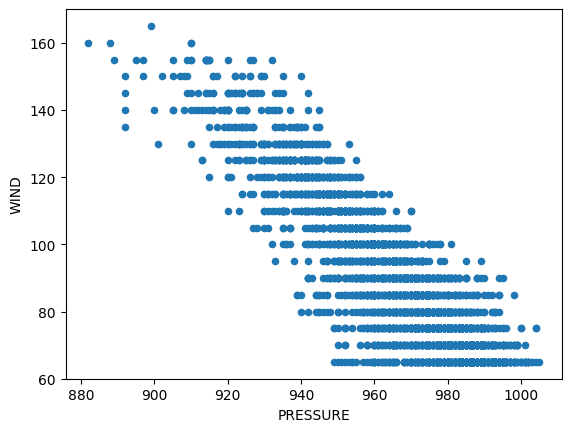

In [17]:
df_wk_hur.plot.scatter(x = 'PRESSURE', y = 'WIND',)

## There are some slight outliers at the extreme low pressures and highest wind speeds. But, due to their importance these rows were not deleted.

## Grouping hurricane name w/ lowest pressure measurement creating a DataFrame w/ one line per hurricane name.



In [18]:
df_wk_hur_grp = df_wk_hur.loc[df_wk_hur.groupby('NAME')['PRESSURE'].idxmin()]
print(df_wk_hur_grp.head(10))

       INDEX      NAME       YEAR      MONTH  DAY  HOUR   LAT  LONG  \
4279    4280  AL121991 1991-01-01 1900-11-01    1    18  38.2 -66.5   
7552    7553   Alberto 2000-01-01 1900-08-01   12    12  35.9 -55.3   
12528  12529      Alex 2010-01-01 1900-07-01    1     2  24.2 -97.7   
1701    1702    Alicia 1983-01-01 1900-08-01   18     7  29.1 -95.1   
959      960     Allen 1980-01-01 1900-08-01    7    18  21.8 -86.4   
5008    5009   Allison 1995-01-01 1900-06-01    4    12  24.7 -86.2   
4326    4327    Andrew 1992-01-01 1900-08-01   23    18  25.4 -75.8   
379      380     Anita 1977-01-01 1900-09-01    2     6  24.2 -97.1   
2711    2712    Arlene 1987-01-01 1900-08-01   22    12  38.0 -43.0   
14728  14729    Arthur 2014-01-01 1900-07-01    4     6  35.3 -76.0   

          STATUS  CATEGORY  WIND  PRESSURE  TROPICALSTORM_FORCE_DIAMETER  \
4279   hurricane       1.0    65       980                           NaN   
7552   hurricane       3.0   110       950                        

In [19]:
df_wk_hur_grp.sort_values(['YEAR', 'MONTH'], inplace=True)
print(df_wk_hur_grp.head(10))

     INDEX      NAME       YEAR      MONTH  DAY  HOUR   LAT  LONG     STATUS  \
47      48   Blanche 1975-01-01 1900-07-01   28     0  39.3 -67.2  hurricane   
78      79  Caroline 1975-01-01 1900-08-01   31     6  24.1 -97.5  hurricane   
103    104     Doris 1975-01-01 1900-09-01    2     6  36.4 -44.5  hurricane   
153    154    Eloise 1975-01-01 1900-09-01   23    12  30.2 -86.3  hurricane   
175    176      Faye 1975-01-01 1900-09-01   28    18  42.3 -52.0  hurricane   
217    218    Gladys 1975-01-01 1900-10-01    2    12  35.3 -69.8  hurricane   
249    250     Belle 1976-01-01 1900-08-01    9     0  30.9 -75.3  hurricane   
275    276   Candice 1976-01-01 1900-08-01   22    18  41.3 -56.4  hurricane   
298    299      Emmy 1976-01-01 1900-08-01   29    12  35.0 -56.8  hurricane   
360    361     Holly 1976-01-01 1900-10-01   24    12  24.9 -58.1  hurricane   

     CATEGORY  WIND  PRESSURE  TROPICALSTORM_FORCE_DIAMETER  \
47        1.0    75       980                           

In [20]:
print(df_wk_hur_grp.tail(10))

       INDEX      NAME       YEAR      MONTH  DAY  HOUR   LAT  LONG  \
18246  18247     Gamma 2020-01-01 1900-10-01    3    16  20.2 -87.4   
18351  18352      Zeta 2020-01-01 1900-10-01   28    21  29.2 -90.6   
18367  18368       Eta 2020-01-01 1900-11-01    3     6  14.0 -82.9   
18464  18465      Iota 2020-01-01 1900-11-01   16    12  13.5 -81.5   
18539  18540      Elsa 2021-01-01 1900-07-01    2    18  13.8 -62.4   
18653  18654     Grace 2021-01-01 1900-08-01   21     0  20.7 -95.8   
18712  18713       Ida 2021-01-01 1900-08-01   29    12  28.5 -89.6   
18792  18793     Larry 2021-01-01 1900-09-01    5    12  19.2 -49.4   
18835  18836  Nicholas 2021-01-01 1900-09-01   14     0  28.0 -96.2   
18947  18948       Sam 2021-01-01 1900-09-01   26    18  14.1 -50.3   

          STATUS  CATEGORY  WIND  PRESSURE  TROPICALSTORM_FORCE_DIAMETER  \
18246  hurricane       1.0    65       978                         120.0   
18351  hurricane       3.0   100       970                        

In [21]:
df_wk_hur_grp.shape

(173, 14)

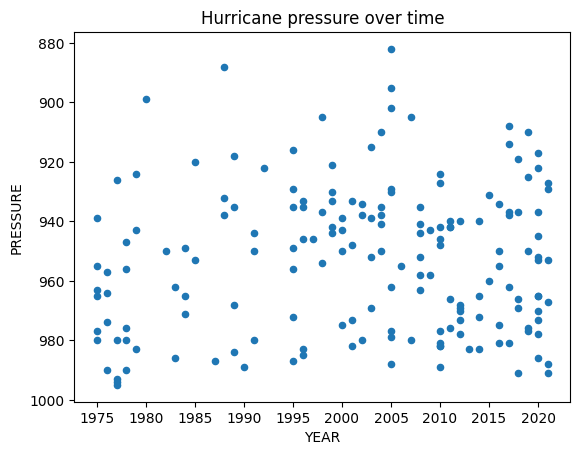

In [22]:
grp_plot = df_wk_hur_grp.plot.scatter(x = 'YEAR', y = 'PRESSURE',)
plt.title("Hurricane pressure over time")
grp_plot.invert_yaxis()
# cursor = mplcursors.cursor(grp_plot)
# cursor = mplcursors.cursor()
# cursor.connect("add", lambda sel: sel.annotation.set_text(df_wk_hur_grp.loc[sel.target.index, 'YEAR']))

plt.show()

### NOTES:  
  - Given the high correlation of hurricane pressure to wind speed (-0.90), only PRESSURE is used to indicate hurricane intensity.
  - The data collection cursors are not functioning.  Cannot find a fix for this feature.  The plan was to show NAME, WIND, and PRESURE in the cursors.


## Findings
  - The data shows that there were 6 hurricanes before 2010 that showed lower pressure measuremnts and higher wind speeds than any hurricanes in the years following 2010.
## Supporting Data
  - The correlation value of -0.9 shows a strong negative relationship between barametric pressure of the hurricane and wind speed.  The top 6 hurricanes in the scatter plot above have pressure values from ~915 to ~875.  No hurricane after 2010 have those very low pressure measurements.
## Summary
  - From this analysis, the title question:  "Have US hurricanes increased in intensity over time?" shows the intensity of hurricanes is not increasing over the time period of this dataset.
## Recomendations
  - Considering the conclusions from this analysis, more research should be done adding other aspects of hurricane intensity such as sea water temperature, CO2 levels, and the cost of hurricane recovery.